# Import libraries 

In [4]:
# Import libraries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# Data loading and Processing 

In [6]:
# Load the dataset: 
data = pd.read_csv("C:/Users/nn474/OneDrive/Desktop/Kaggle study/student_depression_dataset.csv")

In [7]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [8]:
data.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [9]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [10]:
data.shape

(27901, 18)

In [11]:
data.info

<bound method DataFrame.info of            id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Sat

In [12]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [13]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [14]:
data['Depression'].unique

<bound method Series.unique of 0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int64>

In [15]:
missing_values= data.isnull().sum
print(missing_values)

<bound method DataFrame.sum of           id  Gender    Age   City  Profession  Academic Pressure  \
0      False   False  False  False       False              False   
1      False   False  False  False       False              False   
2      False   False  False  False       False              False   
3      False   False  False  False       False              False   
4      False   False  False  False       False              False   
...      ...     ...    ...    ...         ...                ...   
27896  False   False  False  False       False              False   
27897  False   False  False  False       False              False   
27898  False   False  False  False       False              False   
27899  False   False  False  False       False              False   
27900  False   False  False  False       False              False   

       Work Pressure   CGPA  Study Satisfaction  Job Satisfaction  \
0              False  False               False             False   
1 

In [16]:
data.isnull()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Descriptive Analytics:

# Distribution of Male and Female students: 

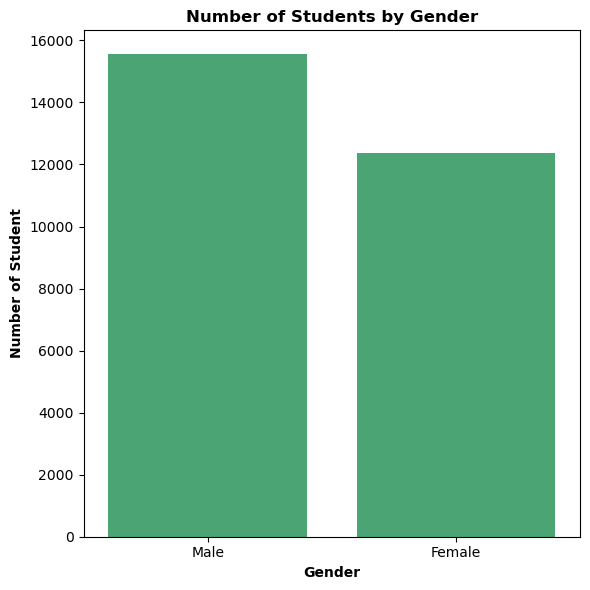

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='Gender', color = '#3CB371')
plt.title('Number of Students by Gender',fontsize=12, fontweight='bold')
plt.xlabel('Gender',fontweight='bold', fontsize =10)
plt.ylabel('Number of Student',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

# Distribution of studetns among Depression and not Depression

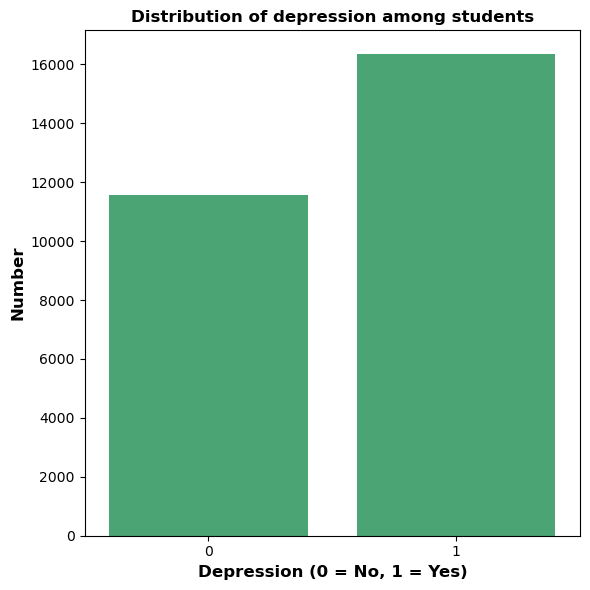

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x = 'Depression', color = '#3CB371')
plt.title ('Distribution of depression among students', fontsize = 12, fontweight = 'bold')
plt.xlabel('Depression (0 = No, 1 = Yes)', fontsize = 12, fontweight = 'bold')
plt.ylabel ('Number', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()


# Distribution of sleep duration:

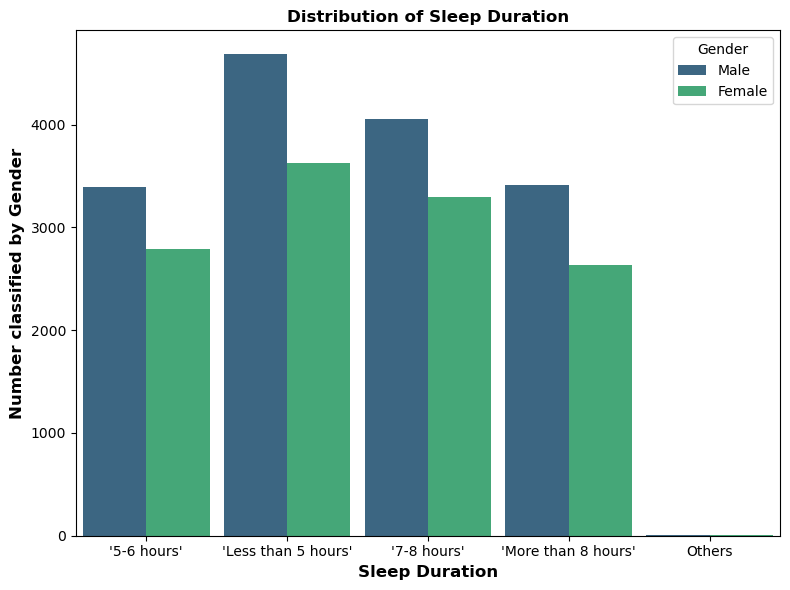

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = 'Sleep Duration',palette='viridis', hue='Gender', width =0.9)
plt.title ('Distribution of Sleep Duration', fontsize = 12, fontweight = 'bold')
plt.xlabel('Sleep Duration', fontsize = 12, fontweight = 'bold')
plt.ylabel ('Number classified by Gender', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

# Distribution of Sleep Duration group by Depression:

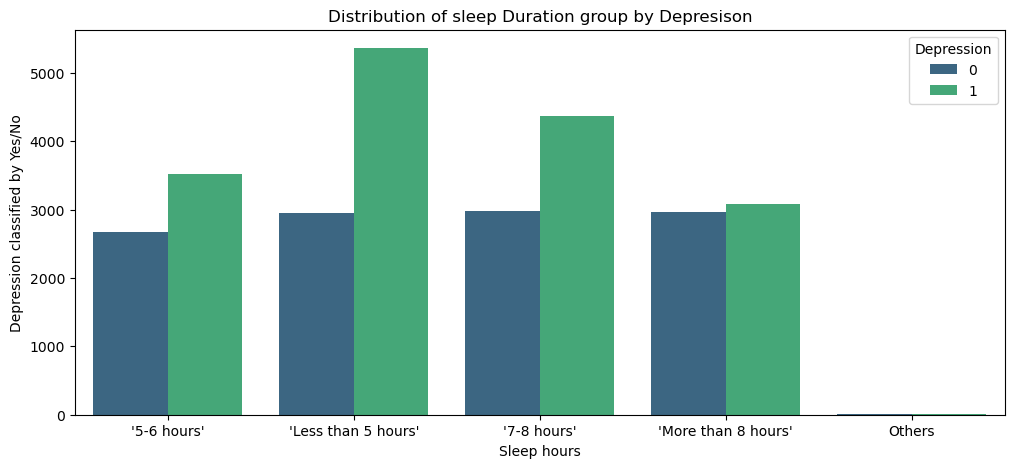

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, x = 'Sleep Duration', hue = 'Depression', palette = 'viridis')
plt.title("Distribution of sleep Duration group by Depresison")
plt.xlabel("Sleep hours")
plt.ylabel('Depression classified by Yes/No')
plt.tight_layout
plt.show()

# Financial Stress vs Suicidial thoughts:

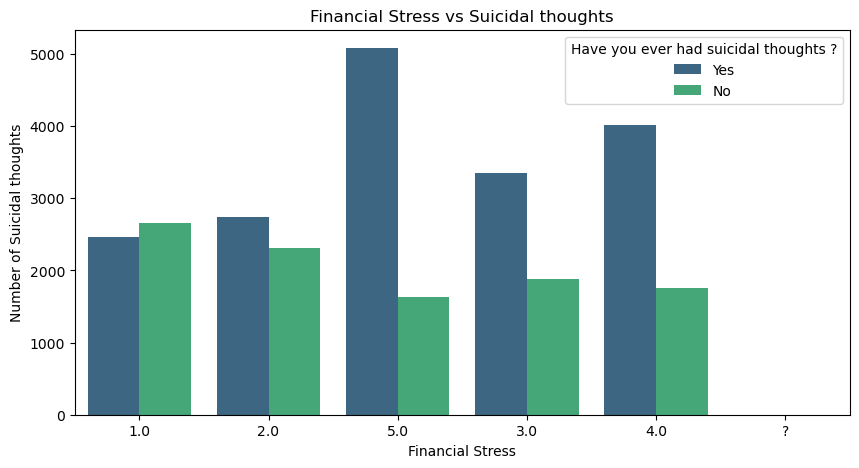

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x = 'Financial Stress', hue = 'Have you ever had suicidal thoughts ?', palette = 'viridis')
plt.title ("Financial Stress vs Suicidal thoughts")
plt.xlabel("Financial Stress")
plt.ylabel ("Number of Suicidal thoughts")
plt.tight_layout 
plt.show()

# Eat problems vs work hours:

C:\Users\nn474\AppData\Local\Temp\ipykernel_5320\2338870687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x = 'Dietary Habits', y = 'Work/Study Hours', palette = 'viridis')


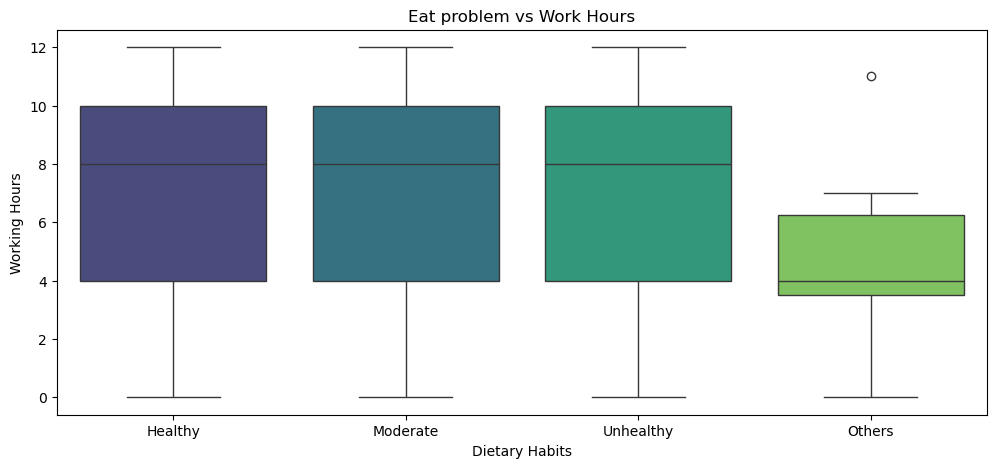

In [29]:
plt.figure (figsize = (12,5))
sns.boxplot(data=data, x = 'Dietary Habits', y = 'Work/Study Hours', palette = 'viridis')
plt.title ('Eat problem vs Work Hours')
plt.xlabel ('Dietary Habits')
plt.ylabel ('Working Hours')
plt.tight_layout 
plt.show()

# Histogram for Age Distribution

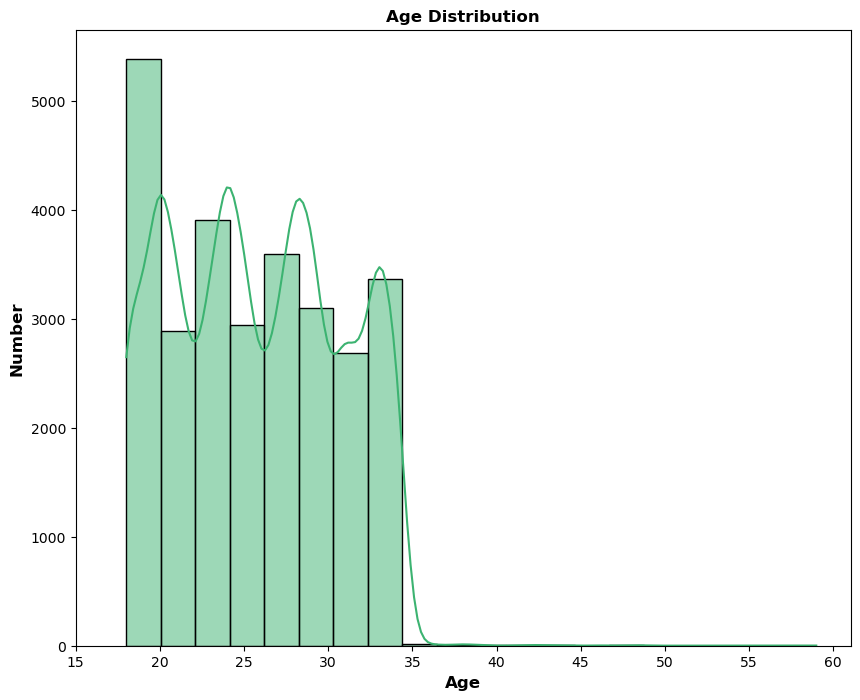

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x= data['Age'].dropna(), bins =20, kde = True, color = '#3CB371' )
plt.title('Age Distribution', fontweight = 'bold', fontsize=12)
plt.xticks(range(15, int(data['Age'].max()) + 5, 5))
plt.xlabel('Age', fontweight = 'bold', fontsize= 12 )
plt.ylabel('Number', fontweight = 'bold', fontsize= 12)
plt.tight_layout
plt.show()

# Correlation matrix:

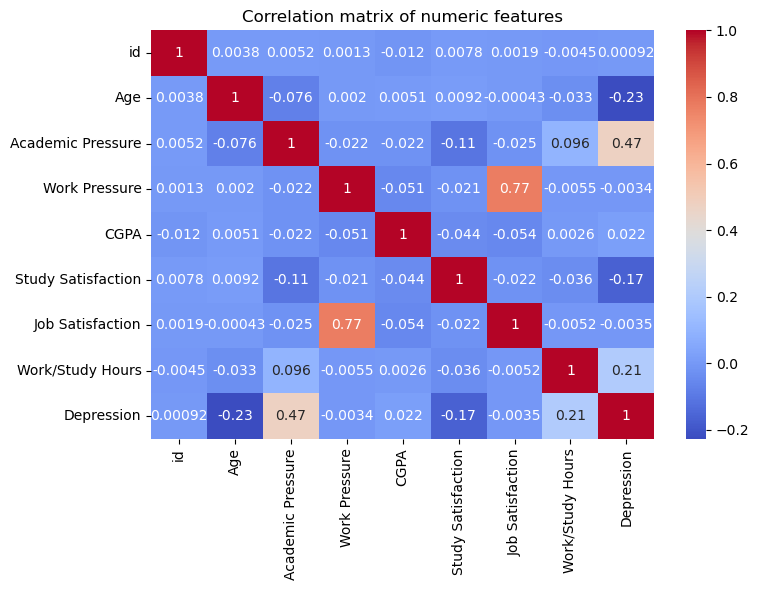

In [33]:
numeric_data = data.select_dtypes(include = [np.number])
if numeric_data.shape[1] >= 4: 
    plt.figure(figsize =(8,6))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
    plt.title('Correlation matrix of numeric features')
    plt.tight_layout()
    plt.show()

# Distribtuion of Academic Pressure:

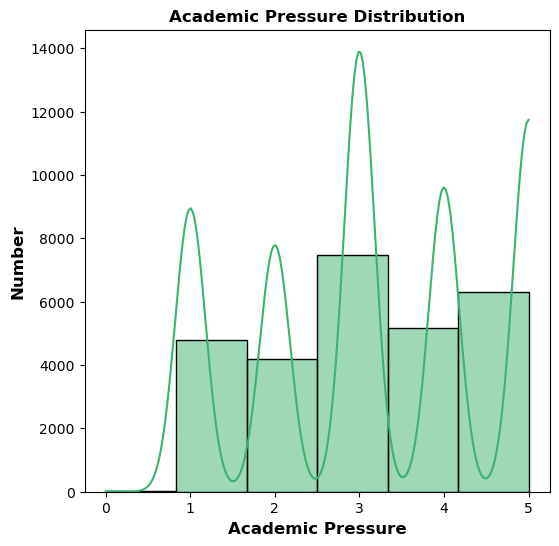

In [35]:
plt.figure(figsize=(6,6))
sns.histplot(data=data, x= data['Academic Pressure'].dropna(),  bins =6, kde = True, color = '#3CB371' )
plt.title('Academic Pressure Distribution', fontweight = 'bold', fontsize=12)
plt.xticks(range(0, int(data['Academic Pressure'].max()) + 1 , 1))
plt.xlabel('Academic Pressure', fontweight = 'bold', fontsize= 12 )
plt.ylabel('Number', fontweight = 'bold', fontsize= 12)
plt.tight_layout
plt.show()

# Academic Pressure by Gender

C:\Users\nn474\AppData\Local\Temp\ipykernel_5320\3854459882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Gender'], y = data['Academic Pressure'], palette = 'viridis')


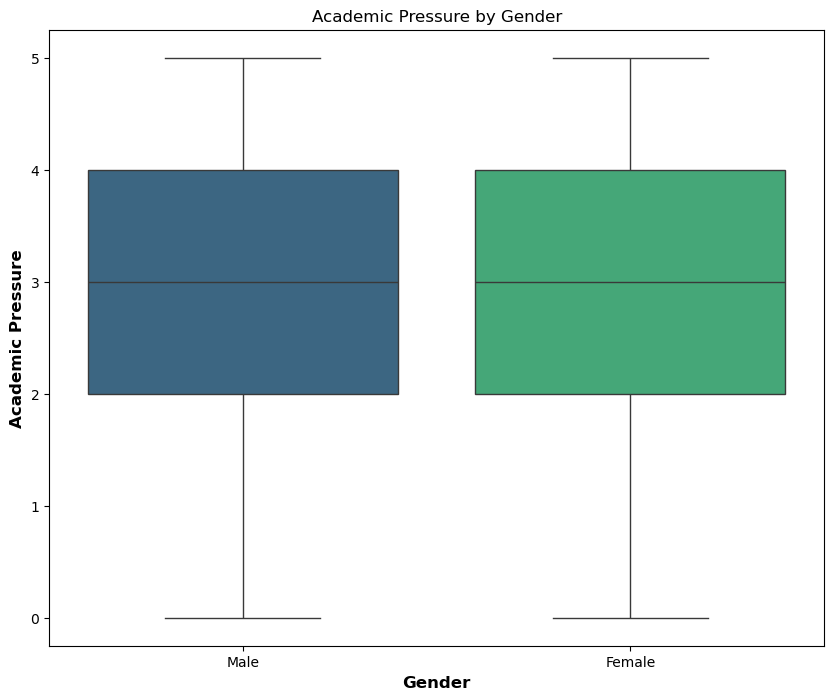

In [37]:
plt.figure (figsize = (10,8))
sns.boxplot(data=data, x=data['Gender'], y = data['Academic Pressure'], palette = 'viridis')
plt.title ("Academic Pressure by Gender")
plt.xlabel("Gender", fontweight = 'bold', fontsize = 12)
plt.ylabel("Academic Pressure", fontweight = 'bold', fontsize = 12)
plt.tight_layout
plt.show()

# Distribution of Degree:

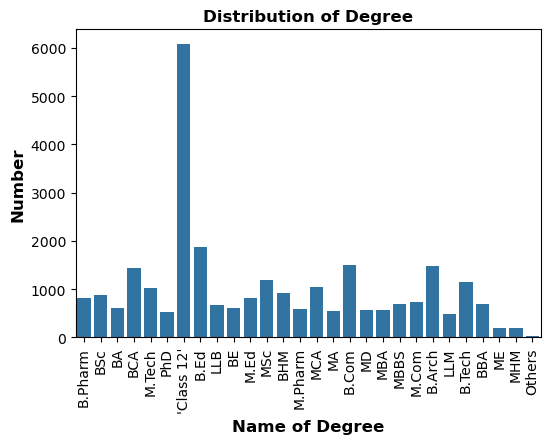

In [39]:
plt.figure (figsize =(6,4))
sns.countplot(data=data, x = "Degree" )
plt.title("Distribution of Degree", fontweight = 'bold', fontsize = 12)
plt.xlabel("Name of Degree", fontweight = 'bold', fontsize = 12)
plt.ylabel ("Number", fontweight = 'bold', fontsize = 12 )
plt.xticks(rotation = 90)
plt.tight_layout
plt.show()

# Logistic Regression 
# Predictor Creator and Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      3505
           1       0.78      0.81      0.79      4866

    accuracy                           0.76      8371
   macro avg       0.75      0.75      0.75      8371
weighted avg       0.75      0.76      0.75      8371

Prediction Accuracy Score: 0.7562


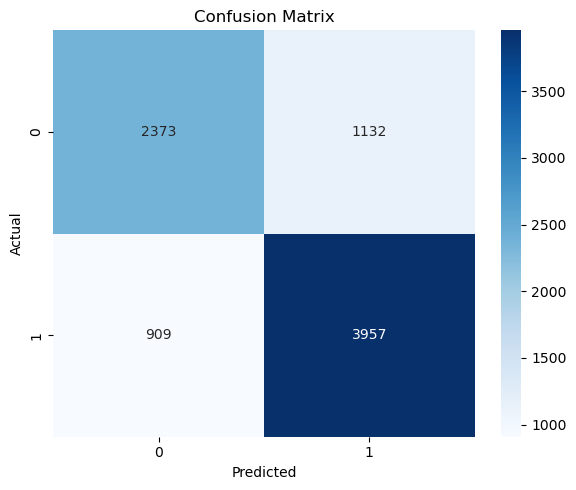

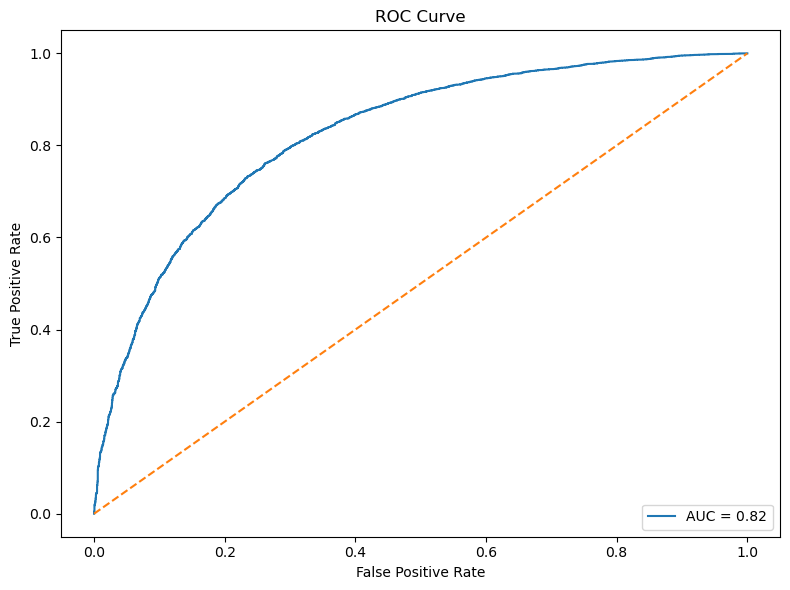

Feature Coefficients:
Academic Pressure     0.826839
Work/Study Hours      0.117653
CGPA                  0.051620
Job Satisfaction      0.000055
Work Pressure        -0.008511
Age                  -0.109627
Study Satisfaction   -0.229698
dtype: float64

Feature Coefficients (including intercept):
Academic Pressure     0.826839
intercept             0.151833
Work/Study Hours      0.117653
CGPA                  0.051620
Job Satisfaction      0.000055
Work Pressure        -0.008511
Age                  -0.109627
Study Satisfaction   -0.229698
dtype: float64


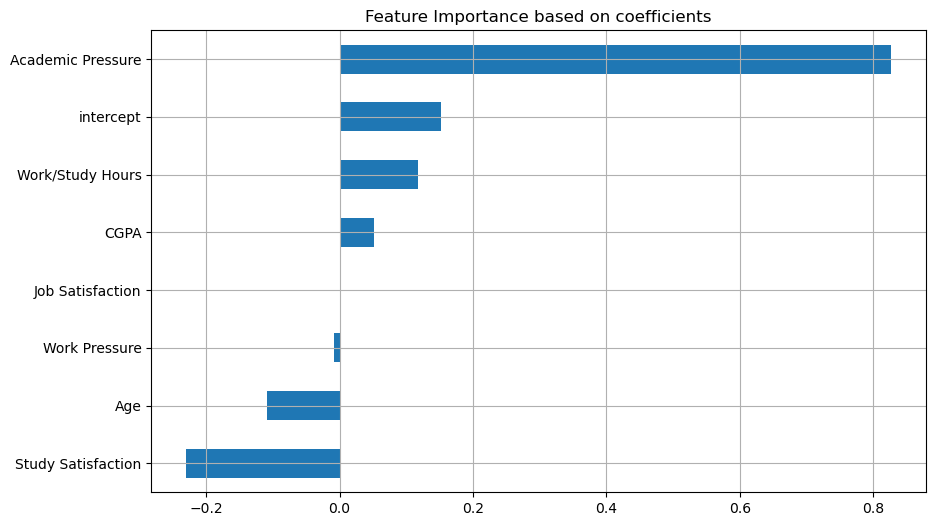

In [41]:
# Select featrues and target variable:
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

# Check if all these features are existed in the dataset:
for feature in features:
    if feature not in data.columns:
        print(f'Warning: {feature} is not in the dataset')

# Define X and Y:
X = data[features]
Y = data['Depression']

# Handle missing values in selected features (if any) by manipulating with mean
X.loc[:, :] = X.fillna(X.mean())

# Split the data into training and testing sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Create and fit the logistic regression model:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)


# Predict on the test data:
Y_prediction = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, Y_prediction))


# Calculate prediction accuracy:
accuracy = accuracy_score(Y_test, Y_prediction)
print(f'Prediction Accuracy Score: {accuracy:.4f}')

# Confision Matrix:
cm = confusion_matrix(Y_test, Y_prediction)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Roc Curve:
Y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
roc_auc= auc (fpr,tpr) 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Display model coefficients for insight 
coefficients = pd.Series(model.coef_[0], index = features)
print('Feature Coefficients:')
print(coefficients.sort_values(ascending=False))
print()

# Create a Series with all coefficients including the intercept
all_features = ['intercept'] + features
all_coefficients = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=all_features)

print('Feature Coefficients (including intercept):')
print(all_coefficients.sort_values(ascending=False))

# Bar plot of coefficient:
plt.figure(figsize = (10,6))
all_coefficients.sort_values().plot(kind='barh', grid = True)
plt.title('Feature Importance based on coefficients')
plt.tight_layout 
plt.show()
